# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [4]:
from commonfunctions import *
from skimage.filters import gaussian,laplace
from scipy.signal import convolve2d
from skimage.exposure import rescale_intensity

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


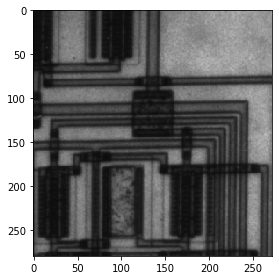

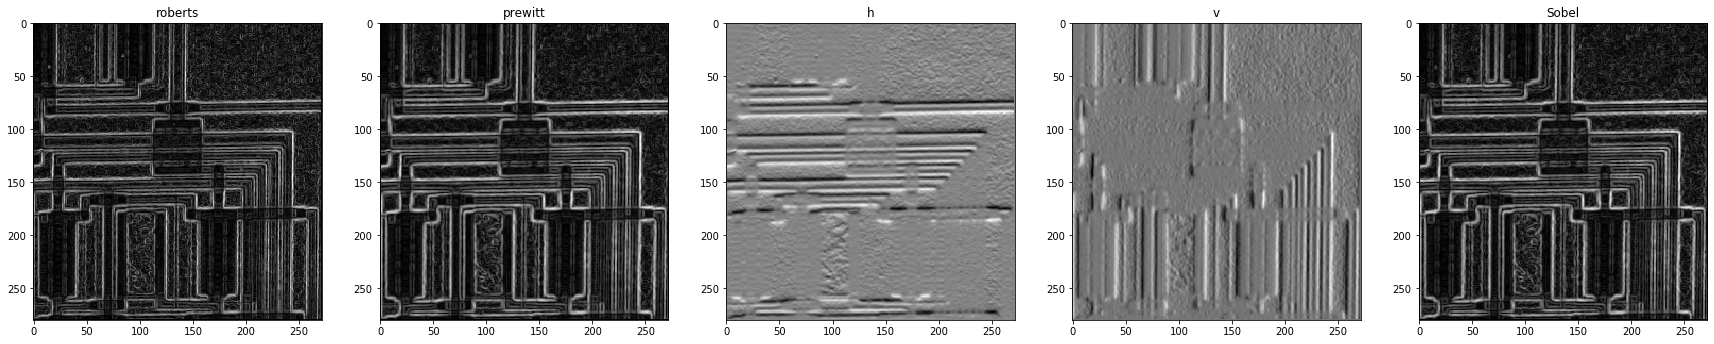

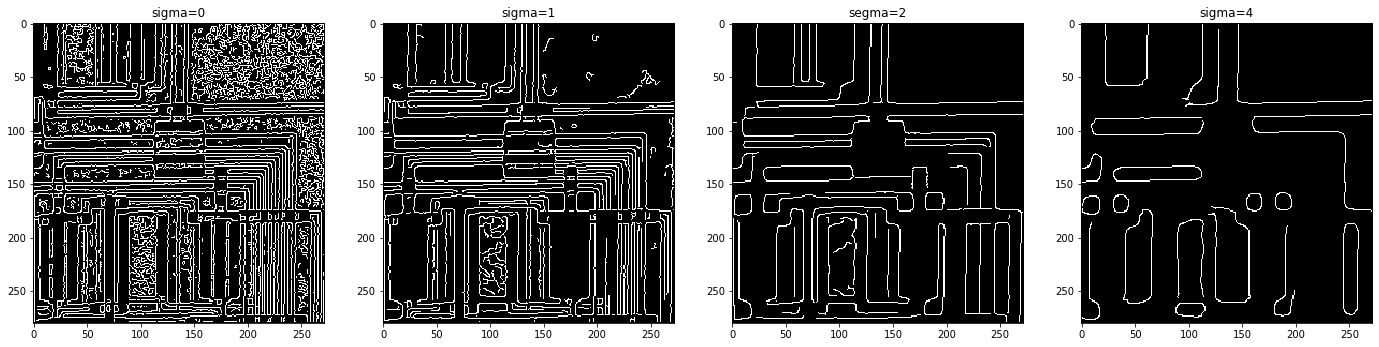

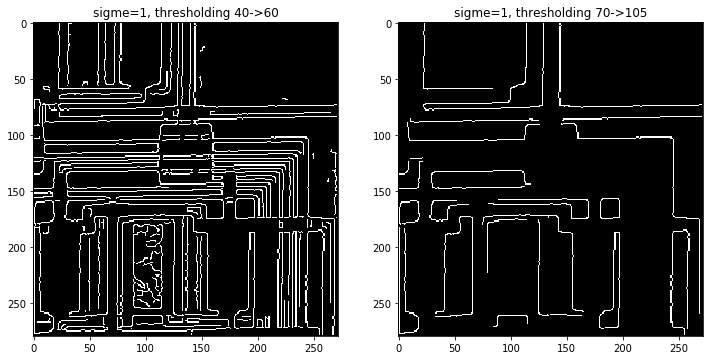

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

In [5]:
circuit_grey=io.imread("circuit.tif", as_gray=True)
io.imshow(circuit_grey)
io.show()
'''
we can notice the noise produced by roberts technique because of its 2*2 filters

when we apply sobel in H we mean to detect the horizonatal edgedes, we can notice that unedged areas colored by mid gray color
that's happened because when we apply convolution by sobel filter we in fact are getting the first derivative, so when we are going from white area to black area the result will be negative value, and when we are going from black area to white area the result is a poitive value, if the color is constant then the result will be 0
we now obtain a matrix of zeros, negatives and positives in the next step we are applying normalization so negatives are transformed to zeros, zeros are transformed to mid value, positives are transformed to high value (255)

when we apply canny with sigma=0 we are keeping all noise (or in other words all undesired and unimportant edges)
we notice when we apply canny with higher sigma the output will be more accurate due to the smoothing step but also if sigma get very high value we are discarding a lot of details so the output will keep only the most strongest edges in the image like the output of canny with sigma=4

when applying canny with sigma 1 and tuning the values of lower and upper thresholding we are providing information about which edges we are caring about, the idea of upper and lower thresholding that:
maybe there is strong edge in part of the image so it will have a high value and will be detected as an edge but if it's connected to another strong edge via a weak edge , the output will have disconnected edges because we will discard the in-between range, to solve this problem we are deciding upper and lower thresholding to give an information "take this pixel into interest if its neighbours also are lying in-between range or in the upper range"

'''
roberts = roberts(circuit_grey)
prewitt = prewitt(circuit_grey)
sobel_horizontal = sobel_h(circuit_grey) 
sobel_vertical = sobel_v(circuit_grey) 
sobel = sobel(circuit_grey) 
# io.imshow(sobel_horizontal)
# io.show()
canny_nosigma =canny(circuit_grey,sigma=0)
canny1 =canny(circuit_grey)
canny2 =canny(circuit_grey, sigma=2)
canny4 =canny(circuit_grey, sigma=4)
canny1_thresholding40 =canny(circuit_grey,sigma=1,low_threshold=40,high_threshold=60)
canny1_thresholding70 =canny(circuit_grey,sigma=1,low_threshold=100,high_threshold=150)

show_images([roberts,prewitt,sobel_horizontal,sobel_vertical,sobel],["roberts","prewitt","h","v","Sobel"])
show_images([canny_nosigma,canny1,canny2,canny4],["sigma=0","sigma=1","segma=2","sigma=4"])
show_images([canny1_thresholding40,canny1_thresholding70],["sigme=1, thresholding 40->60","sigme=1, thresholding 70->105"])

'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

In [6]:
# 1. Built-in Sobel, Prewill, Roberts
img = rgb2gray(io.imread('circuit.tif'))



In [7]:
# 2. Custom Sobel (V-H-Both)
def Sobel(img_path,threshold):
    #to be similar to the implemented one flip the negatives and positives
    hy=np.array([
    (-1,0,1),
    (-2,0,2),
    (-1,0,1)
    ])
    hx=np.array([
    (-1,-2,-1),
    (0,0,0),
    (1,2,1)
    ])
    img=io.imread(img_path,as_gray=True)
    sobel_horizontal=convolve2d(img, hx, boundary='symm', mode='same')
    sobel_vertical=convolve2d(img, hy, boundary='symm', mode='same')
    sobeled=np.sqrt((np.square(sobel_horizontal)+np.square(sobel_vertical)))
    thresholded=np.copy(sobeled)
    thresholded[(thresholded<threshold)]=0
    thresholded[(thresholded>=threshold)]=255
    return sobel_horizontal,sobel_vertical,sobeled,thresholded




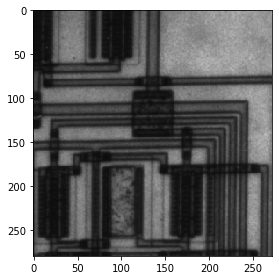

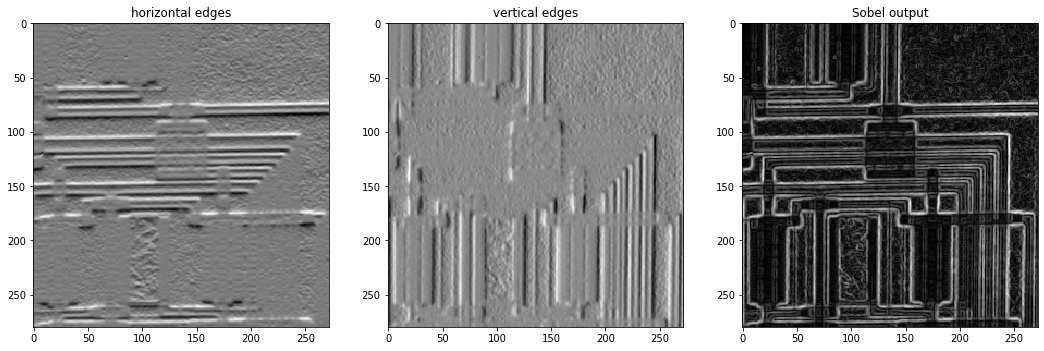

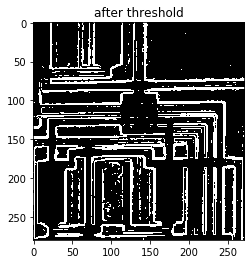

In [8]:
img=io.imread("circuit.tif",as_gray=True)
io.imshow(img)
io.show()
sobel_horizontal,sobel_vertical,sobeled,thresholded=Sobel("circuit.tif",105)
show_images([sobel_horizontal,sobel_vertical,sobeled],["horizontal edges","vertical edges","Sobel output"])
show_images([thresholded],["after threshold"])


In [11]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''


'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'

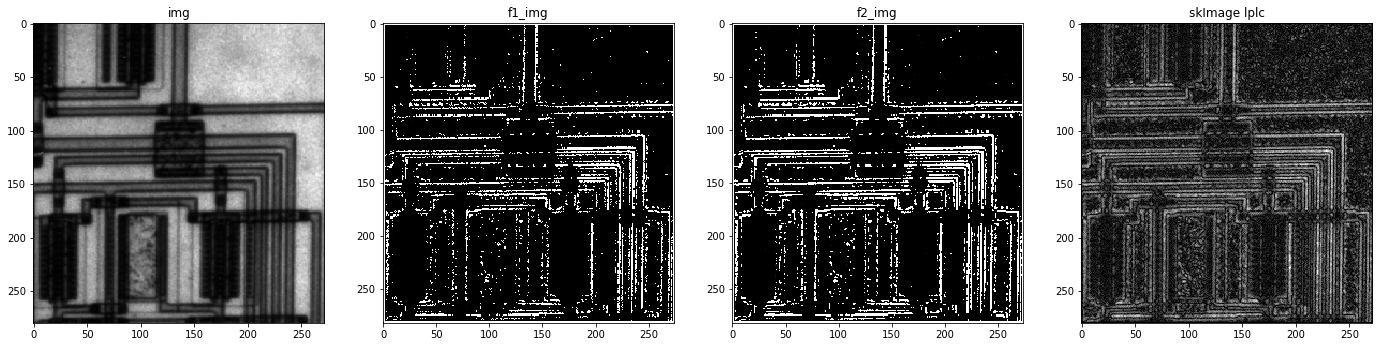

In [16]:
# 3. Custom LoG
thres= 20
#/home/belal/Downloads/untitled.png
img = io.imread('circuit.tif',as_gray=True)
filtered_img=gaussian(image=img,sigma=1)
filtered_img=np.array(filtered_img*255,dtype= np.uint8)

f1=np.array([
    [ 0, 1, 0],
    [ 1,-4, 1],
    [ 0, 1, 0]
])
f2=np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])
f1_img=convolve2d(filtered_img,f1)
f2_img=convolve2d(filtered_img,f2)

f1_img=np.abs(f1_img) 
vec_f1_img=np.reshape(f1_img,(f1_img.shape[0]*f1_img.shape[1],1))
vec_f1_img[vec_f1_img>9]=255
vec_f1_img[vec_f1_img<9]=0
f1_img=np.reshape(vec_f1_img,(f1_img.shape[0],f1_img.shape[1]))

f2_img=np.abs(f2_img) 
vec_f2_img=np.reshape(f2_img,(f2_img.shape[0]*f2_img.shape[1],1))
vec_f2_img[vec_f2_img>25]=255
vec_f2_img[vec_f2_img<25]=0
f2_img=np.reshape(vec_f2_img,(f2_img.shape[0],f2_img.shape[1]))

lplc = laplace(filtered_img,5)

show_images( [img, f1_img,f2_img,np.abs(lplc)],['img', 'f1_img','f2_img','skImage lplc'])